<a href="https://colab.research.google.com/github/NNaveenKV2348535/NNaveenKV2348535/blob/main/2348535_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing the libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


# **2. Importing the dataset**

In [2]:
# Load the dataset
df = pd.read_csv('/content/customer_support_tickets.csv')
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


#  **3.Data PreProcessing**

In [3]:
# returns description of the data
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [4]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [5]:
# returns a DataFrame object
#where all the values are replaced with a Boolean
#value True for NULL values, and otherwise False
print(df.isnull().sum()) #no missing values

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


#  **4. Binning**

In [6]:
#Sample dataset with ticket response time in hours
data = {'ticket_id': [1, 2, 3, 4, 5],
        'response_time': [0.5, 2, 4, 1, 3]}
df = pd.DataFrame(data)

# Define bins and labels
bins = [0, 1, 3, 5]  # Bins for response time
labels = ['0-1 hours', '1-3 hours', '3-5 hours']

# Add a new column with bin labels
df['response_time_bin'] = pd.cut(df['response_time'], bins=bins, labels=labels)

print("Binned Dataset:")
print(df)


Binned Dataset:
   ticket_id  response_time response_time_bin
0          1            0.5         0-1 hours
1          2            2.0         1-3 hours
2          3            4.0         3-5 hours
3          4            1.0         0-1 hours
4          5            3.0         1-3 hours


#  **5. Bar Plotting**

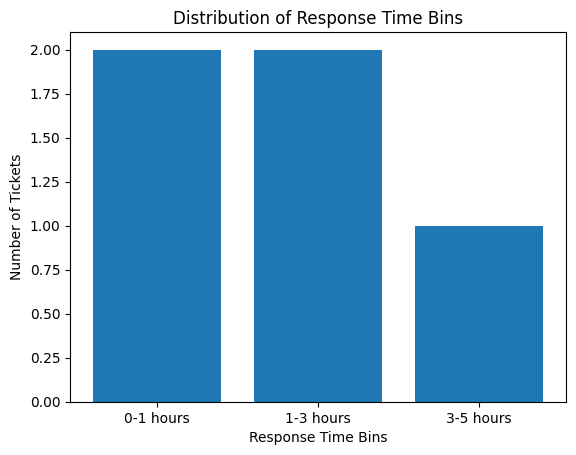

In [7]:
# Count the occurrences of each bin
bin_counts = df['response_time_bin'].value_counts()

# Create a bar plot
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Response Time Bins')
plt.ylabel('Number of Tickets')
plt.title('Distribution of Response Time Bins')
plt.show()

#  **6. One hot Encoding**

In [8]:
# Perform one-hot encoding on the binned column
df_encoded = pd.get_dummies(df, columns=['response_time_bin'], drop_first=True)

print("One-Hot Encoded Dataset:")
print(df_encoded)


One-Hot Encoded Dataset:
   ticket_id  response_time  response_time_bin_1-3 hours  \
0          1            0.5                            0   
1          2            2.0                            1   
2          3            4.0                            0   
3          4            1.0                            0   
4          5            3.0                            1   

   response_time_bin_3-5 hours  
0                            0  
1                            0  
2                            1  
3                            0  
4                            0  


#  **7. Covariance Matrix Heatmap**

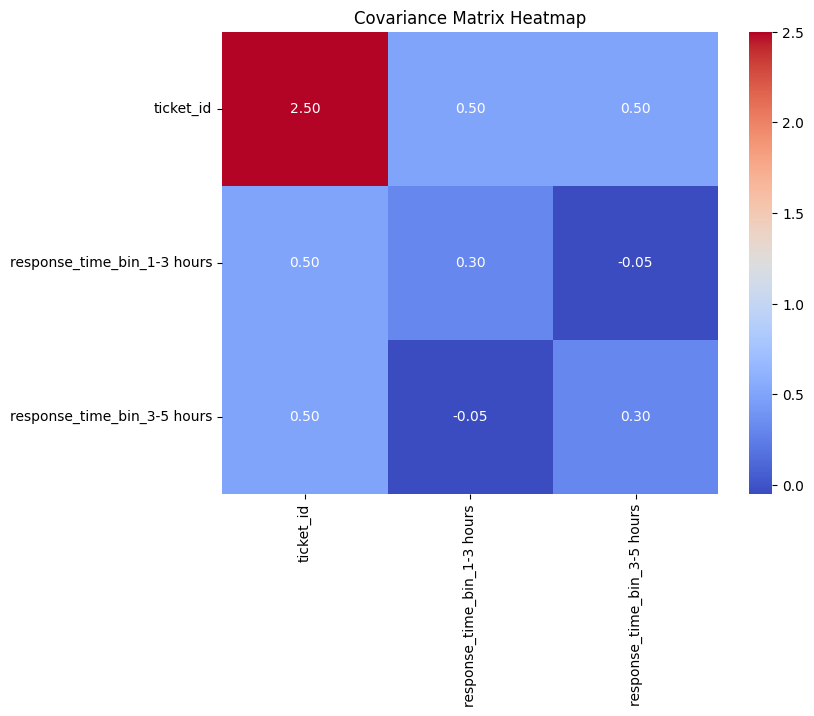

In [10]:
# Sample dataset with one-hot encoded response time bins
data = {'ticket_id': [1, 2, 3, 4, 5],
        'response_time_bin_1-3 hours': [0, 1, 0, 1, 1],
        'response_time_bin_3-5 hours': [0, 0, 1, 0, 1]}
df_encoded = pd.DataFrame(data)

# Calculate the covariance matrix
covariance_matrix = df_encoded.cov()

# Create a heatmap to visualize the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('The Covariance Matrix Heatmap')
plt.show()


# **8. Chi-Square Test**

In [11]:
data = {'ticket_id': [1, 2, 3, 4, 5],
        'category': ['Tech', 'Billing', 'Tech', 'Tech', 'Billing'],
        'satisfaction': ['Satisfied', 'Dissatisfied', 'Satisfied', 'Satisfied', 'Dissatisfied']}
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['category'], df['satisfaction'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square:", chi2)
print("P-value:", p)



Chi-Square: 1.7013888888888886
P-value: 0.19210644086793857


# **9. T-Test**

In [12]:
data = {'ticket_id': [1, 2, 3, 4, 5],
        'new_customer': [True, False, True, False, True],
        'response_time': [0.5, 2, 4, 1, 3]}
df = pd.DataFrame(data)

# Split data into two groups based on 'new_customer'
group1 = df[df['new_customer']]
group2 = df[~df['new_customer']]

# Perform independent t-test
t_statistic, p_value = ttest_ind(group1['response_time'], group2['response_time'])

print("T-Statistic:", t_statistic)
print("P-value:", p_value)


T-Statistic: 0.7171371656006362
P-value: 0.5250825576257868
